In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv('Used_car_price.csv')

In [3]:
df.head()

,Unnamed: 0,manufactured,brand,varient,owner,fuel,type,kms,price,city
0,0,2012,Maruti,"['Swift', 'Dzire']",1st Owner,Diesel,Manual,"1,18,117 km",316399,New Delhi
1,1,2013,Maruti,['Swift'],1st Owner,Diesel,Manual,"1,14,506 km",341599,New Delhi
2,2,2014,Maruti,['Ritz'],1st Owner,Diesel,Manual,"43,382 km",344199,New Delhi
3,3,2013,Hyundai,['i20'],1st Owner,Diesel,Manual,"64,361 km",355799,New Delhi
4,4,2014,Maruti,['Swift'],1st Owner,Petrol,Manual,"1,07,206 km",401599,New Delhi


In [4]:
df = df.rename(columns={'Unnamed: 0': 'car_id'})
df = df.rename(columns={'varient': 'variant'})
df.sample(5)

,car_id,manufactured,brand,variant,owner,fuel,type,kms,price,city
3128,128,2013,Honda,['Brio'],1st Owner,Petrol,Manual,"52,861 km",408699,Bengaluru
4909,222,2021,Nissan,['Kicks'],-,Petrol,manual,"8,901 kms","10,59,000",delhi-ncr
461,461,2018,Ford,['Ecosport'],2nd Owner,Diesel,Manual,"52,134 km",628299,New Delhi
4795,108,2018,Maruti,['Baleno'],-,Petrol,automatic,"36,519 kms","7,97,500",bangalore
1007,7,2011,Hyundai,['i20'],1st Owner,Petrol,Manual,"29,080 km",313099,Gurgaon


In [5]:
#Check the columns and rows
df.shape

(5387, 10)

In [6]:
#Check for the dtypes
df.dtypes

car_id           int64
manufactured     int64
brand           object
variant         object
owner           object
fuel            object
type            object
kms             object
price           object
city            object
dtype: object

In [7]:
#Data Cleaning
#Remove all the comma in the dataset
df.replace(',','', regex=True, inplace=True)
df.head()

,car_id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,['Swift' 'Dzire'],1st Owner,Diesel,Manual,118117 km,316399,New Delhi
1,1,2013,Maruti,['Swift'],1st Owner,Diesel,Manual,114506 km,341599,New Delhi
2,2,2014,Maruti,['Ritz'],1st Owner,Diesel,Manual,43382 km,344199,New Delhi
3,3,2013,Hyundai,['i20'],1st Owner,Diesel,Manual,64361 km,355799,New Delhi
4,4,2014,Maruti,['Swift'],1st Owner,Petrol,Manual,107206 km,401599,New Delhi


In [8]:
df.variant.unique()

array(["['Swift' 'Dzire']", "['Swift']", "['Ritz']", "['i20']",
       "['City']", "['Wagon' 'R' '1.0']", "['Ciaz']", "['Fiesta']",
       "['S60']", "['Baleno']", "['Tiago']", "['Verna']", "['Fortuner']",
       "['X3']", "['AURA']", "['Tucson' 'New']", "['3' 'Series']",
       "['TUV300']", "['S' 'Cross']", "['New' 'Wagon-R']", "['Xcent']",
       "['Bolero']", "['IGNIS']", "['New' 'Figo']", "['i10']",
       "['Creta']", "['Elite' 'i20']", "['Redi' 'Go']", "['VENUE']",
       "['Ecosport']", "['Dzire']", "['Q3']", "['Glanza']",
       "['Grand' 'i10']", "['HECTOR']", "['Innova']",
       "['Vitara' 'Brezza']", "['Amaze']", "['Ertiga']", "['Superb']",
       "['WR-V']", "['Jazz']", "['Kwid']", "['Figo' 'Aspire']",
       "['YARIS']", "['Corolla' 'Altis']", "['Brio']", "['Duster']",
       "['S' 'PRESSO']", "['Etios' 'Liva']", "['Alto' 'K10']",
       "['Etios']", "['Polo']", "['Alto']", "['Alto' '800']",
       "['XUV500']", "['5' 'Series']", "['Celerio']", "['Eon']",
       "['Vento

In [9]:
#Cleaning variant column
df['variant'] = df["variant"].str.replace("^\['|'\]$","")
df['variant'] = df["variant"].str.replace("'","")
df['variant'] = df["variant"].str.replace(","," ")
df['variant'] = df["variant"].str.replace("I20","i20")
df['variant'] = df["variant"].str.replace("NEW","New")
df['variant'] = df["variant"].str.replace("AURA","Aura")
df['variant'] = df["variant"].str.replace("IGNIS","Ignis")
df['variant'] = df["variant"].str.replace("VENUE","Venue")
df['variant'] = df["variant"].str.replace("HECTOR","Hector")
df['variant'] = df["variant"].str.replace("S  PRESSO","S-Presso")
df['variant'] = df["variant"].str.replace("GRAND  I10  NIOS","Grand  i10  Nios")
df['variant'] = df["variant"].str.replace("FREESTYLE","Freestyle")
df['variant'] = df["variant"].str.replace("NEXON","Nexon")
df['variant'] = df["variant"].str.replace("SELTOS","Seltos")
df['variant'] = df["variant"].str.replace("MARAZZO","Marazzo")
df['variant'] = df["variant"].str.replace("SANTRO","Santro")
df['variant'] = df["variant"].str.replace("OMNI","Omni")
df['variant'] = df["variant"].str.replace("TRIBER","Triber")
df['variant'] = df["variant"].str.replace("KWID","Kwid")
df['variant'] = df["variant"].str.replace("KWID","Kwid")
df.query("variant == '[]'")['variant'].count()

C:\Users\USER\AppData\Local\Temp\ipykernel_8924\4127563513.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['variant'] = df["variant"].str.replace("^\['|'\]$","")


2

In [10]:
#Checking for empty values and dropping
df = df[df.variant != '[]']
df.query("variant == '[]'")['variant'].count()

0

In [11]:
# Adding brands to the model variants for later uses
df.brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Ford', 'Volvo', 'Tata', 'Toyota',
       'BMW', 'Mahindra', 'Datsun', 'Audi', 'MG', 'Skoda', 'Renault',
       'Volkswagen', 'HYUNDAI', 'Nissan', 'KIA', 'Jeep', 'Mercedes',
       'Landrover', 'Jaguar', 'Kia', 'Chevrolet', 'Mercedes-Benz',
       'Mitsubishi', 'Land'], dtype=object)

In [12]:
#Replacing same brand with small and uppercase problem
df.replace('HYUNDAI','Hyundai', regex=True, inplace=True)
df.replace('KIA','Kia', regex=True, inplace=True)
df.replace('Mercedes-Benz','Mercedes', regex=True, inplace=True)
df = df[df.brand != 'Land']

In [13]:
mask = (df['brand'] == 'Maruti')
df.loc[mask, 'variant'] = 'Maruti ' + df['variant'].astype(str)

In [14]:
mask = (df['brand'] == 'Hyundai')
df.loc[mask, 'variant'] = 'Hyundai ' + df['variant'].astype(str)

In [15]:
mask = (df['brand'] == 'Honda')
df.loc[mask, 'variant'] = 'Honda ' + df['variant'].astype(str)

In [16]:
mask = (df['brand'] == 'Ford')
df.loc[mask, 'variant'] = 'Ford ' + df['variant'].astype(str)

In [17]:
mask = (df['brand'] == 'Volvo')
df.loc[mask, 'variant'] = 'Volvo ' + df['variant'].astype(str)

In [18]:
mask = (df['brand'] == 'Tata')
df.loc[mask, 'variant'] = 'Tata ' + df['variant'].astype(str)

In [19]:
mask = (df['brand'] == 'BMW')
df.loc[mask, 'variant'] = 'BMW ' + df['variant'].astype(str)

In [20]:
mask = (df['brand'] == 'Toyota')
df.loc[mask, 'variant'] = 'Toyota ' + df['variant'].astype(str)

In [21]:
mask = (df['brand'] == 'Mahindra')
df.loc[mask, 'variant'] = 'Mahindra ' + df['variant'].astype(str)

In [22]:
mask = (df['brand'] == 'Datsun')
df.loc[mask, 'variant'] = 'Datsun ' + df['variant'].astype(str)

In [23]:
mask = (df['brand'] == 'Audi')
df.loc[mask, 'variant'] = 'Audi ' + df['variant'].astype(str)

In [24]:
mask = (df['brand'] == 'MG')
df.loc[mask, 'variant'] = 'MG ' + df['variant'].astype(str)

In [25]:
mask = (df['brand'] == 'Renault')
df.loc[mask, 'variant'] = 'Renault ' + df['variant'].astype(str)

In [26]:
mask = (df['brand'] == 'Volkswagen')
df.loc[mask, 'variant'] = 'Volkswagen ' + df['variant'].astype(str)

In [27]:
mask = (df['brand'] == 'Skoda')
df.loc[mask, 'variant'] = 'Skoda ' + df['variant'].astype(str)

In [28]:
mask = (df['brand'] == 'Nissan')
df.loc[mask, 'variant'] = 'Nissan ' + df['variant'].astype(str)

In [29]:
mask = (df['brand'] == 'Kia')
df.loc[mask, 'variant'] = 'Kia ' + df['variant'].astype(str)

In [30]:
mask = (df['brand'] == 'Jeep')
df.loc[mask, 'variant'] = 'Jeep ' + df['variant'].astype(str)

In [31]:
mask = (df['brand'] == 'Mercedes')
df.loc[mask, 'variant'] = 'Mercedes ' + df['variant'].astype(str)

In [32]:
mask = (df['brand'] == 'Landrover')
df.loc[mask, 'variant'] = 'Landrover ' + df['variant'].astype(str)

In [33]:
mask = (df['brand'] == 'Jaguar')
df.loc[mask, 'variant'] = 'Jaguar ' + df['variant'].astype(str)

In [34]:
mask = (df['brand'] == 'Chevrolet')
df.loc[mask, 'variant'] = 'Chevrolet ' + df['variant'].astype(str)

In [35]:
mask = (df['brand'] == 'Mitsubishi')
df.loc[mask, 'variant'] = 'Mitsubishi ' + df['variant'].astype(str)

In [36]:
df.sample(5)

,car_id,manufactured,brand,variant,owner,fuel,type,kms,price,city
2555,55,2018,Honda,Honda WR-V,1st Owner,Petrol,Manual,15150 km,871099,Pune
3443,443,2020,Renault,Renault Kwid,1st Owner,Petrol,Manual,7591 km,410599,Bengaluru
4604,300,2017,Maruti,Maruti Alto 800,1st Owner,Petrol,Manual,46081 km,305399,Ahmedabad
5005,318,2012,Hyundai,Hyundai i10,-,Petrol,manual,27456 kms,237000,gurgaon
5055,368,2020,Renault,Renault Triber,-,Petrol,automatic,16233 kms,718000,hyderabad


In [37]:
#Null Treatment
#Checking for null values
df.isna().sum()

car_id            0
manufactured      0
brand             0
variant           0
owner             0
fuel              0
type            195
kms               0
price             0
city              0
dtype: int64

In [38]:
#Checking for the unique values of type column
df.type.unique()

array(['Manual', 'Automatic', nan, 'manual', 'automatic'], dtype=object)

In [39]:
#Replacing the small first letter to Capitalized first letter
df.replace('manual','Manual', regex=True, inplace=True)
df.replace('automatic','Automatic', regex=True, inplace=True)
df.type.unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [40]:
#Getting the mode of the type column
df['type'].mode()

0    Manual
Name: type, dtype: object

In [41]:
#Null treatment imputation of the mode
df['type']=df['type'].fillna(df['type'].mode()[0])
df.isna().sum()

car_id          0
manufactured    0
brand           0
variant         0
owner           0
fuel            0
type            0
kms             0
price           0
city            0
dtype: int64

In [42]:
#Checking for duplicated
df.duplicated().sum()

500

In [43]:
#Dropping the duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [44]:
#Checking for the value counts of Fuel, Owner and Type
print("Fuel:\n", df.fuel.value_counts())
print("\nOwner:\n",df.owner.value_counts())
print("\nType:\n",df.type.value_counts())

Fuel:
 Petrol          3343
Diesel          1506
Petrol + CNG      26
CNG                8
Petrol + LPG       1
Name: fuel, dtype: int64

Owner:
 1st Owner       3392
2nd Owner        729
-                488
First Owner      163
3rd Owner         61
Second Owner      40
Third Owner        6
4th Owner          5
Name: owner, dtype: int64

Type:
 Manual       4366
Automatic     518
Name: type, dtype: int64


In [45]:
#Checking for the unique value of owner column
df.owner.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '-',
       'First Owner', 'Second Owner', 'Third Owner'], dtype=object)

In [46]:
#Optimizing the dataset
df.replace('First Owner','1st Owner', regex=True, inplace=True)
df.replace('Second Owner','2nd Owner', regex=True, inplace=True)
df.replace('Third Owner','3rd Owner', regex=True, inplace=True)
df.owner.unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner', '-'],
      dtype=object)

In [47]:
#Replacing the empty value to Null
df.replace('-', np.nan, inplace=True)
df.isna().sum()

car_id            0
manufactured      0
brand             0
variant           0
owner           488
fuel              0
type              0
kms               0
price             0
city              0
dtype: int64

In [48]:
#Checking the mode for owner column
df.owner.mode()

0    1st Owner
Name: owner, dtype: object

In [49]:
#Null treatment by imputation of mode
df['owner']=df['owner'].fillna(df['owner'].mode()[0])
df.isna().sum()

car_id          0
manufactured    0
brand           0
variant         0
owner           0
fuel            0
type            0
kms             0
price           0
city            0
dtype: int64

In [50]:
df.head()

,car_id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Maruti Swift Dzire,1st Owner,Diesel,Manual,118117 km,316399,New Delhi
1,1,2013,Maruti,Maruti Swift,1st Owner,Diesel,Manual,114506 km,341599,New Delhi
2,2,2014,Maruti,Maruti Ritz,1st Owner,Diesel,Manual,43382 km,344199,New Delhi
3,3,2013,Hyundai,Hyundai i20,1st Owner,Diesel,Manual,64361 km,355799,New Delhi
4,4,2014,Maruti,Maruti Swift,1st Owner,Petrol,Manual,107206 km,401599,New Delhi


In [51]:
#Removing km/kms to convert the kms colum to integer
df["kms"] = df["kms"].str.rstrip(" km")
df["kms"] = df["kms"].str.rstrip(" kms")
df

,car_id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Maruti Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi
1,1,2013,Maruti,Maruti Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2,2014,Maruti,Maruti Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi
3,3,2013,Hyundai,Hyundai i20,1st Owner,Diesel,Manual,64361,355799,New Delhi
4,4,2014,Maruti,Maruti Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi
...,...,...,...,...,...,...,...,...,...,...
5382,695,2013,Hyundai,Hyundai i10,1st Owner,Petrol,Manual,56020,291500,noida
5383,696,2013,Hyundai,Hyundai Verna,1st Owner,Petrol,Manual,79174,450000,noida
5384,697,2014,Maruti,Maruti Wagon R,1st Owner,Petrol,Manual,74492,278000,noida
5385,698,2012,Hyundai,Hyundai i10,1st Owner,Petrol,Manual,27456,237000,noida


In [52]:
#Converting the kms to an integer
df=df[df['kms'].str.isnumeric()]
df['kms'] = df['kms'].astype(str).astype(int)
df.dtypes

car_id           int64
manufactured     int64
brand           object
variant         object
owner           object
fuel            object
type            object
kms              int32
price           object
city            object
dtype: object

In [53]:
#Checking for the unique value for the city column
df.city.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad', 'ahmedabad',
       'bangalore', 'chennai', 'delhi-ncr', 'gurgaon', 'hyderabad',
       'jaipur', 'kolkata', 'mumbai', 'new-delhi', 'noida'], dtype=object)

In [54]:
#Checking for the value counts for city column
df.city.value_counts()

New Delhi    500
Gurgaon      500
Mumbai       500
Pune         500
Noida        500
Chennai      488
Bengaluru    444
Ahmedabad    383
Kolkata      271
Hyderabad    101
chennai       79
kolkata       79
hyderabad     60
mumbai        60
jaipur        60
ahmedabad     60
gurgaon       60
delhi-ncr     60
bangalore     60
noida         60
new-delhi     59
Name: city, dtype: int64

In [55]:
#Optimizing the duplicated small letter
df.replace('new-delhi','New Delhi', regex=True, inplace=True)
df.replace('noida','Noida', regex=True, inplace=True)
df.replace('gurgaon','Gurgaon', regex=True, inplace=True)
df.replace('mumbai','Mumbai', regex=True, inplace=True)
df.replace('bangalore','Bengaluru', regex=True, inplace=True)
df.replace('chennai','Chennai', regex=True, inplace=True)
df.replace('ahmedabad','Ahmedabad', regex=True, inplace=True)
df.replace('hyderabad','Hyderabad', regex=True, inplace=True)
df.replace('kolkata','Kolkata', regex=True, inplace=True)
df.replace('jaipur','Jaipur', regex=True, inplace=True)
df.replace('delhi-ncr','Delhi Ncr', regex=True, inplace=True)
df.city.value_counts()

Chennai      567
Noida        560
Gurgaon      560
Mumbai       560
New Delhi    559
Bengaluru    504
Pune         500
Ahmedabad    443
Kolkata      350
Hyderabad    161
Delhi Ncr     60
Jaipur        60
Name: city, dtype: int64

In [56]:
#Checking the value counts for fuel column
df.fuel.value_counts()

Petrol          3343
Diesel          1506
Petrol + CNG      26
CNG                8
Petrol + LPG       1
Name: fuel, dtype: int64

In [57]:
#Optimizing the fuel column and removing the LPG
df['fuel'] = df['fuel'].replace('Petrol + CNG','CNG')
df = df[df.fuel != 'Petrol + LPG']
df.fuel.value_counts()

Petrol    3343
Diesel    1506
CNG         34
Name: fuel, dtype: int64

In [58]:
#Outliers Treatment
#Replace the dtypes of price to int
df=df[df['price'].str.isnumeric()]
df['price'] = df['price'].astype(str).astype(int)

In [59]:
df.describe()

,car_id,manufactured,kms,price
count,4883.000000,4883.000000,4883.00000,4.883000e+03
mean,245.519967,2016.208274,46785.05427,5.858416e+05
std,156.813266,2.439736,33903.56026,3.290705e+05
min,0.000000,1999.000000,58.00000,2.800000e+04
25%,111.500000,2015.000000,21288.50000,3.838490e+05
50%,234.000000,2017.000000,39019.00000,5.067990e+05
75%,365.000000,2018.000000,65316.00000,6.902500e+05
max,699.000000,2021.000000,276914.00000,4.290000e+06


In [60]:
df=df[df['price']<2e6].reset_index(drop=True)

In [61]:
#Create a copy of the cleaned dataset
cars = df.copy()

In [62]:
cars

,car_id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Maruti Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi
1,1,2013,Maruti,Maruti Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2,2014,Maruti,Maruti Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi
3,3,2013,Hyundai,Hyundai i20,1st Owner,Diesel,Manual,64361,355799,New Delhi
4,4,2014,Maruti,Maruti Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi
...,...,...,...,...,...,...,...,...,...,...
4848,695,2013,Hyundai,Hyundai i10,1st Owner,Petrol,Manual,56020,291500,Noida
4849,696,2013,Hyundai,Hyundai Verna,1st Owner,Petrol,Manual,79174,450000,Noida
4850,697,2014,Maruti,Maruti Wagon R,1st Owner,Petrol,Manual,74492,278000,Noida
4851,698,2012,Hyundai,Hyundai i10,1st Owner,Petrol,Manual,27456,237000,Noida


In [63]:
#Check for the brand sorting in asceding order
cars.groupby(cars.brand).size().sort_values(ascending =False)

brand
Maruti        2403
Hyundai       1091
Honda          305
Ford           298
Renault        182
Toyota         142
Volkswagen      98
Tata            94
Mahindra        82
Datsun          26
BMW             23
MG              21
Nissan          20
Kia             18
Skoda           15
Jeep            14
Chevrolet        7
Mercedes         5
Audi             3
Volvo            3
Mitsubishi       1
Landrover        1
Jaguar           1
dtype: int64

In [64]:
#There are 22 unique brand with Maruti brand is most available for purchase/sold followed by Hyundai.

#Drop the row with no varient
cars.dropna(subset=['variant'],axis=0,inplace=True)

In [65]:
#Checking how many different type of unique values
cars.variant.nunique()

143

In [66]:
#Check for the varient returning the 30 largest
cars.groupby('variant')['variant'].size().nlargest(30)

variant
Maruti Swift            400
Hyundai Grand i10       292
Maruti Alto 800         265
Maruti Baleno           262
Ford Ecosport           223
Maruti Vitara Brezza    207
Maruti Swift Dzire      198
Hyundai Elite i20       182
Maruti Alto K10         173
Maruti Wagon R 1.0      161
Renault Kwid            148
Hyundai Creta           123
Maruti Celerio          111
Honda City              104
Hyundai i20              91
Hyundai i10              89
Honda Amaze              80
Maruti Alto              79
Maruti Eeco              76
Maruti Ignis             72
Maruti Ciaz              70
Maruti Ertiga            67
Maruti Dzire             65
Hyundai Verna            62
Volkswagen Polo          61
Hyundai Eon              49
Tata Tiago               48
Hyundai Venue            41
Maruti S Cross           41
Honda Jazz               39
Name: variant, dtype: int64

In [67]:
#There are 144 unique models and Maruti Swift is most popular Model.
cars.head()

,car_id,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,0,2012,Maruti,Maruti Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi
1,1,2013,Maruti,Maruti Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2,2014,Maruti,Maruti Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi
3,3,2013,Hyundai,Hyundai i20,1st Owner,Diesel,Manual,64361,355799,New Delhi
4,4,2014,Maruti,Maruti Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi


In [68]:
#Checking for zero values
cars.query("kms == '0'")['kms'].count()

0

In [69]:
cars.query("price == '0'")['price'].count()

0

In [70]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_id        4853 non-null   int64 
 1   manufactured  4853 non-null   int64 
 2   brand         4853 non-null   object
 3   variant       4853 non-null   object
 4   owner         4853 non-null   object
 5   fuel          4853 non-null   object
 6   type          4853 non-null   object
 7   kms           4853 non-null   int32 
 8   price         4853 non-null   int32 
 9   city          4853 non-null   object
dtypes: int32(2), int64(2), object(6)
memory usage: 341.4+ KB


In [71]:
cars.describe()

,car_id,manufactured,kms,price
count,4853.000000,4853.000000,4853.000000,4.853000e+03
mean,245.462394,2016.203173,46799.349268,5.730540e+05
std,156.563042,2.441469,33935.362250,2.815950e+05
min,0.000000,1999.000000,58.000000,2.800000e+04
25%,112.000000,2015.000000,21325.000000,3.830000e+05
50%,234.000000,2017.000000,39019.000000,5.049990e+05
75%,365.000000,2018.000000,65316.000000,6.856990e+05
max,699.000000,2021.000000,276914.000000,1.950000e+06


In [72]:
#Dropping the car_id since we don't need it
cars.drop(columns=['car_id'], inplace=True)
cars

,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,2012,Maruti,Maruti Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi
1,2013,Maruti,Maruti Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2014,Maruti,Maruti Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi
3,2013,Hyundai,Hyundai i20,1st Owner,Diesel,Manual,64361,355799,New Delhi
4,2014,Maruti,Maruti Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi
...,...,...,...,...,...,...,...,...,...
4848,2013,Hyundai,Hyundai i10,1st Owner,Petrol,Manual,56020,291500,Noida
4849,2013,Hyundai,Hyundai Verna,1st Owner,Petrol,Manual,79174,450000,Noida
4850,2014,Maruti,Maruti Wagon R,1st Owner,Petrol,Manual,74492,278000,Noida
4851,2012,Hyundai,Hyundai i10,1st Owner,Petrol,Manual,27456,237000,Noida


In [73]:
cars.to_csv('Used_car_price_cleaned.csv')

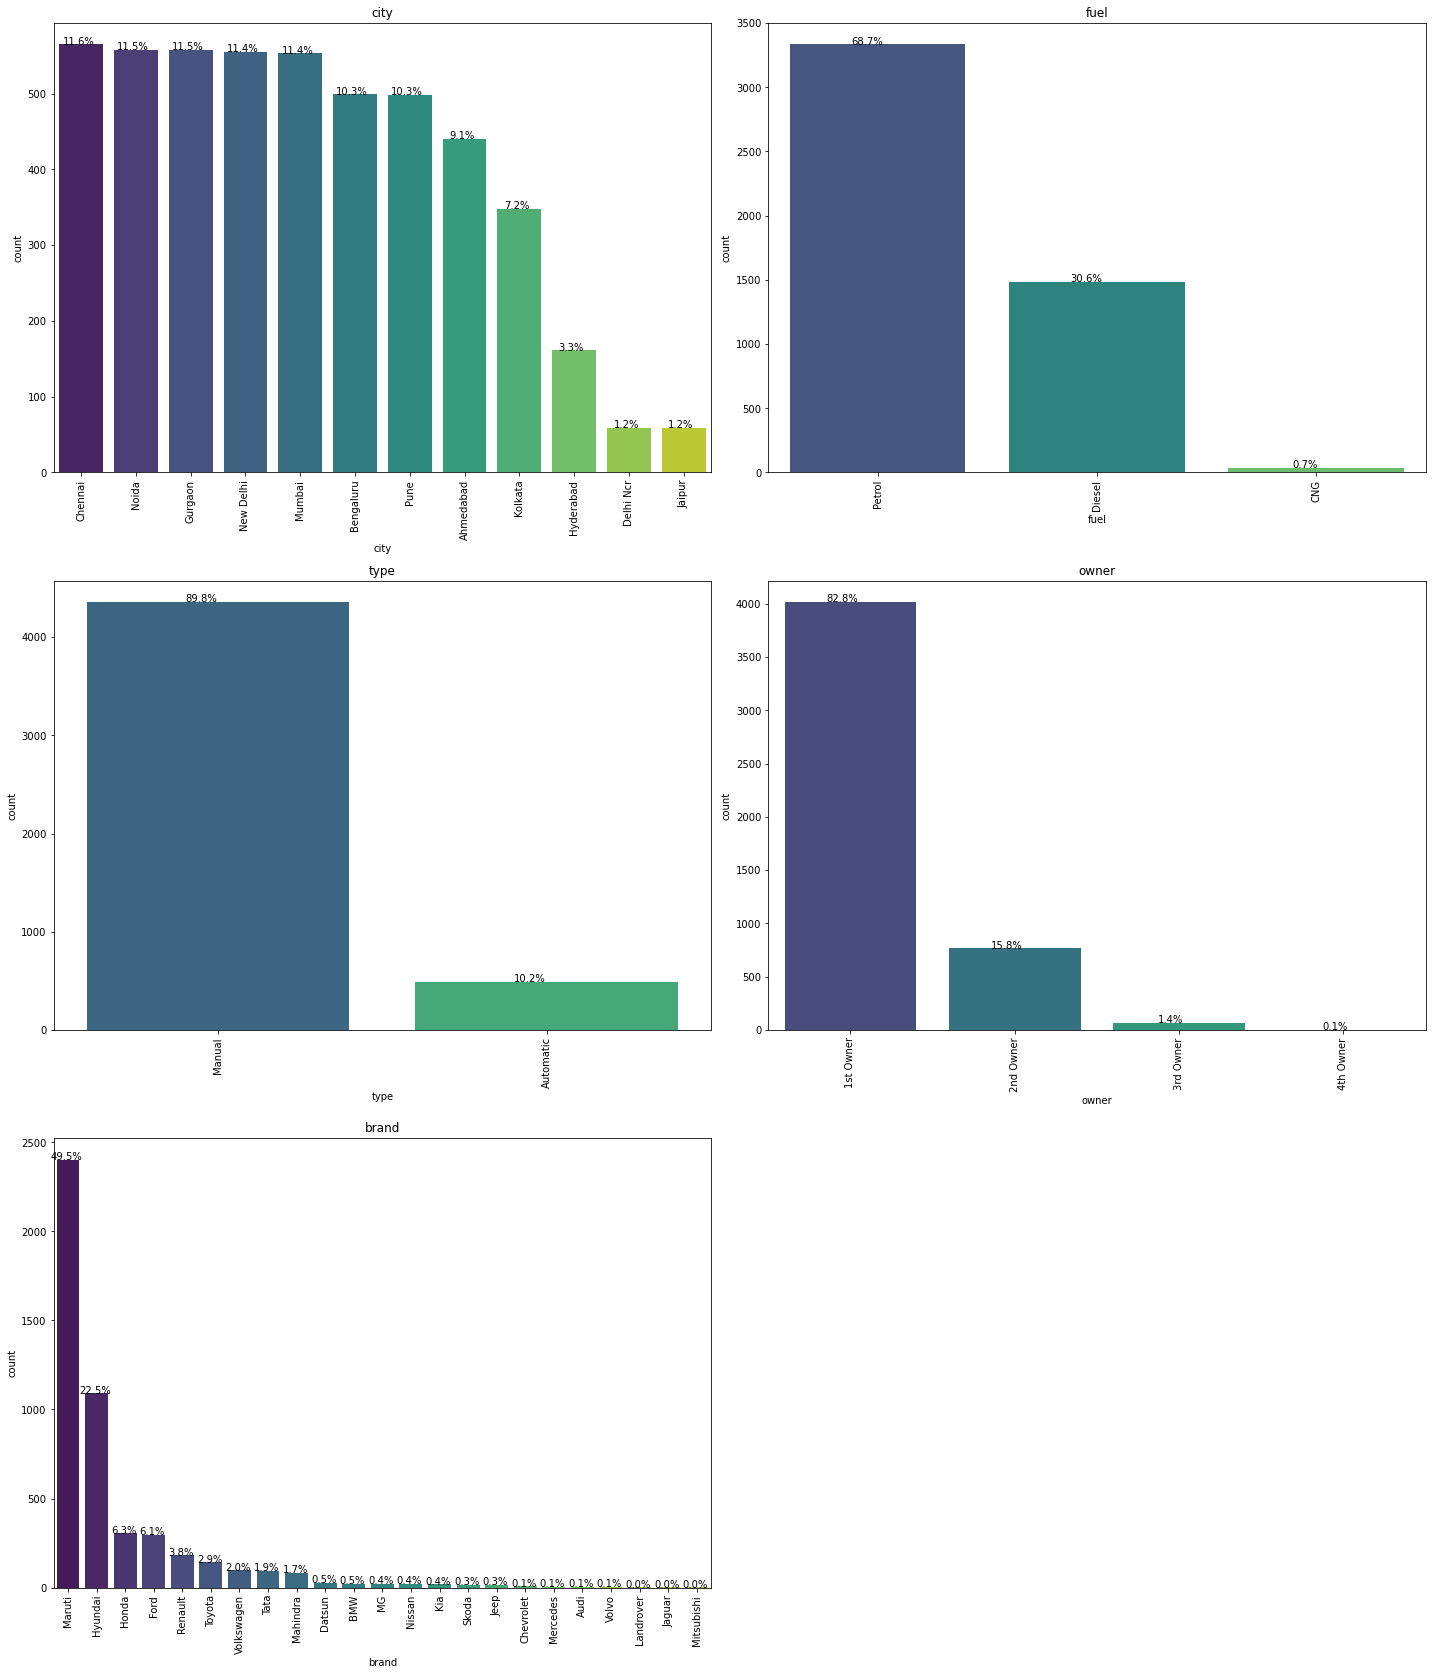

In [74]:
#ERD
cat_columns=['city','fuel','type', 'owner', 'brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sn.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

In [75]:
#OBSERVATION

# Chennai has highest numbers of car availabe for purchase followed by Gurgaon whereas Jaipur and Delhi Ncr has least
# 68% of car being sold/avialable for purchase have fuel type as Petrol.
# 89 % cars available for sell have manual Transmission.
# 82 % cars are First owned cars.
# 49% of car available for sale are from Maruti.

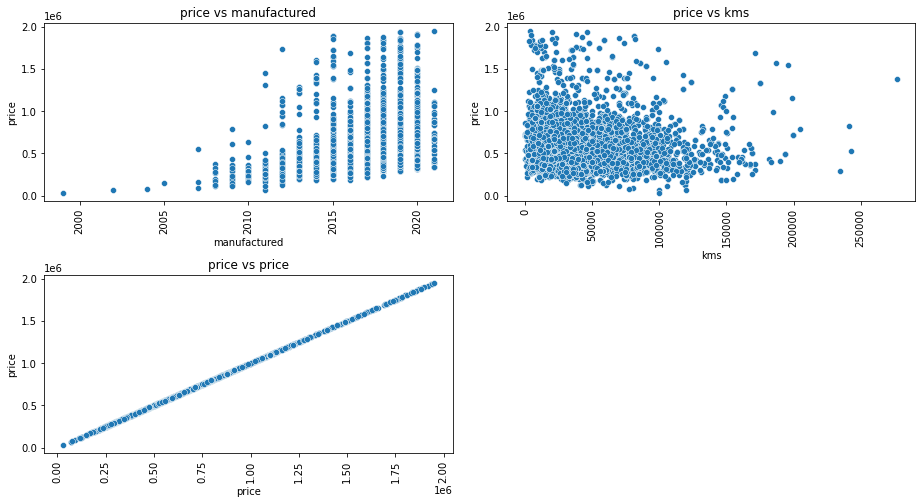

In [76]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sn.scatterplot(x=cars[variable],y=cars['price']).set(title='price vs '+ variable)
                     plt.xticks(rotation=90)
                     plt.tight_layout()

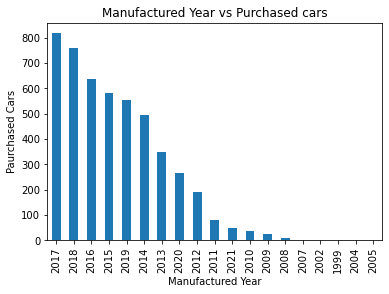

In [77]:
#Manufactured Year and Cars
purchased_car_per_manufactured_year = cars['manufactured'].value_counts()
purchased_car_per_manufactured_year.plot(kind='bar')
plt.xlabel("Manufactured Year")
plt.ylabel("Paurchased Cars")
plt.title("Manufactured Year vs Purchased cars")
plt.show()

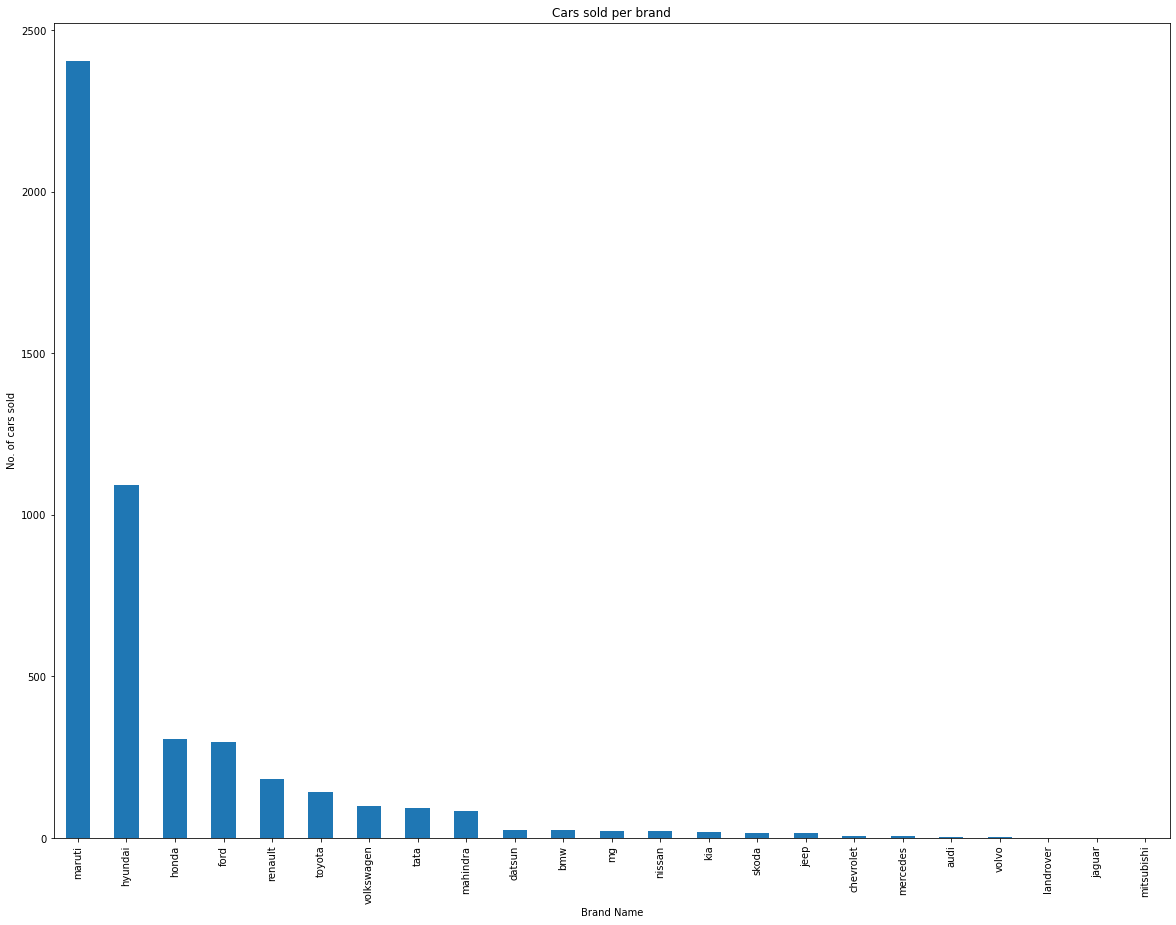

In [78]:
#Cars sold per brand
brand_count=cars['brand'].str.lower().str.split().str.get(0).to_frame()["brand"].value_counts()
plt.figure(figsize=(20,15))
plt.xlabel('Brand Name')
plt.ylabel('No. of cars sold')
plt.title('Cars sold per brand')
brand_count.plot(kind='bar')
plt.show()

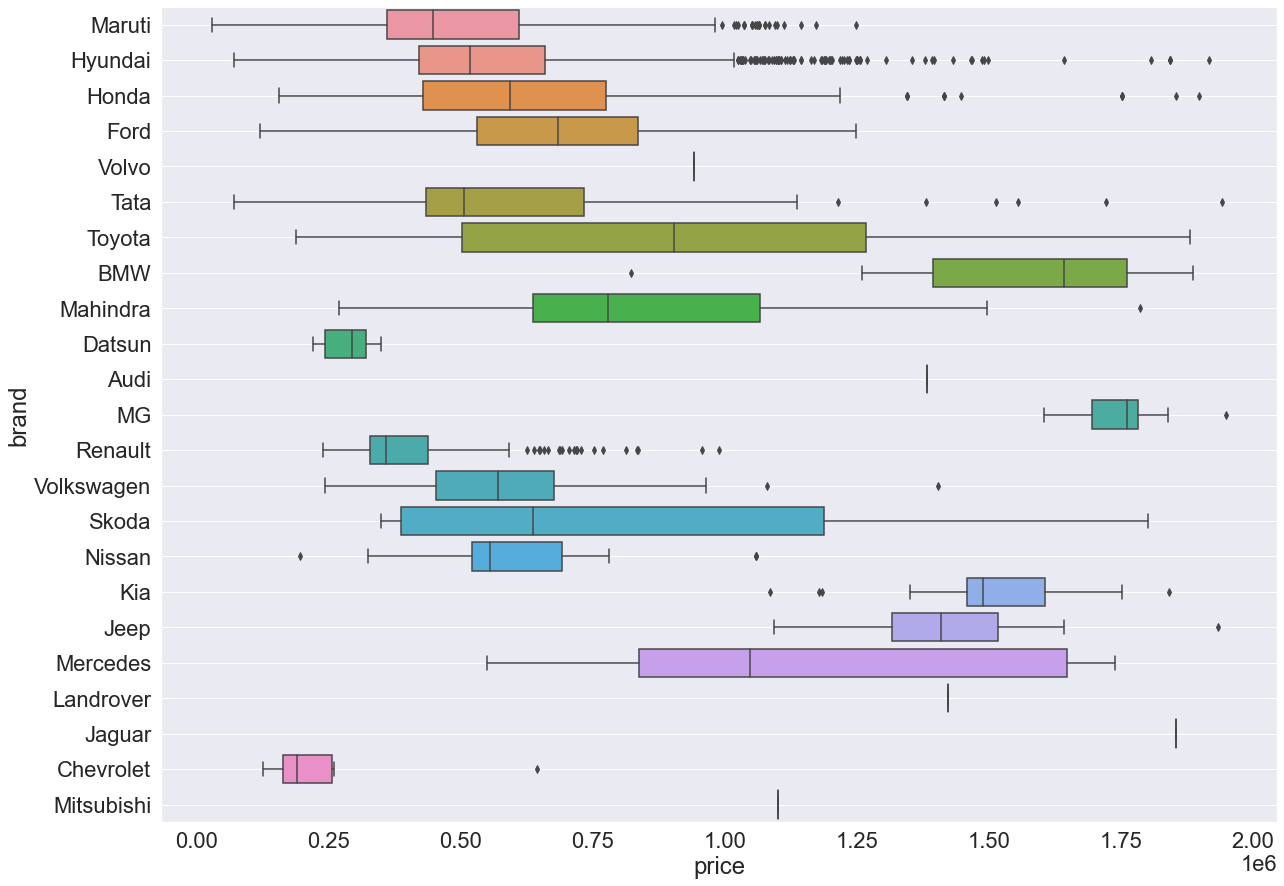

In [79]:
#Price and Brand
plt.figure(figsize=(20,15))
sn.set(font_scale=2)
sn.boxplot(x='price', y='brand', data=cars)
plt.grid()

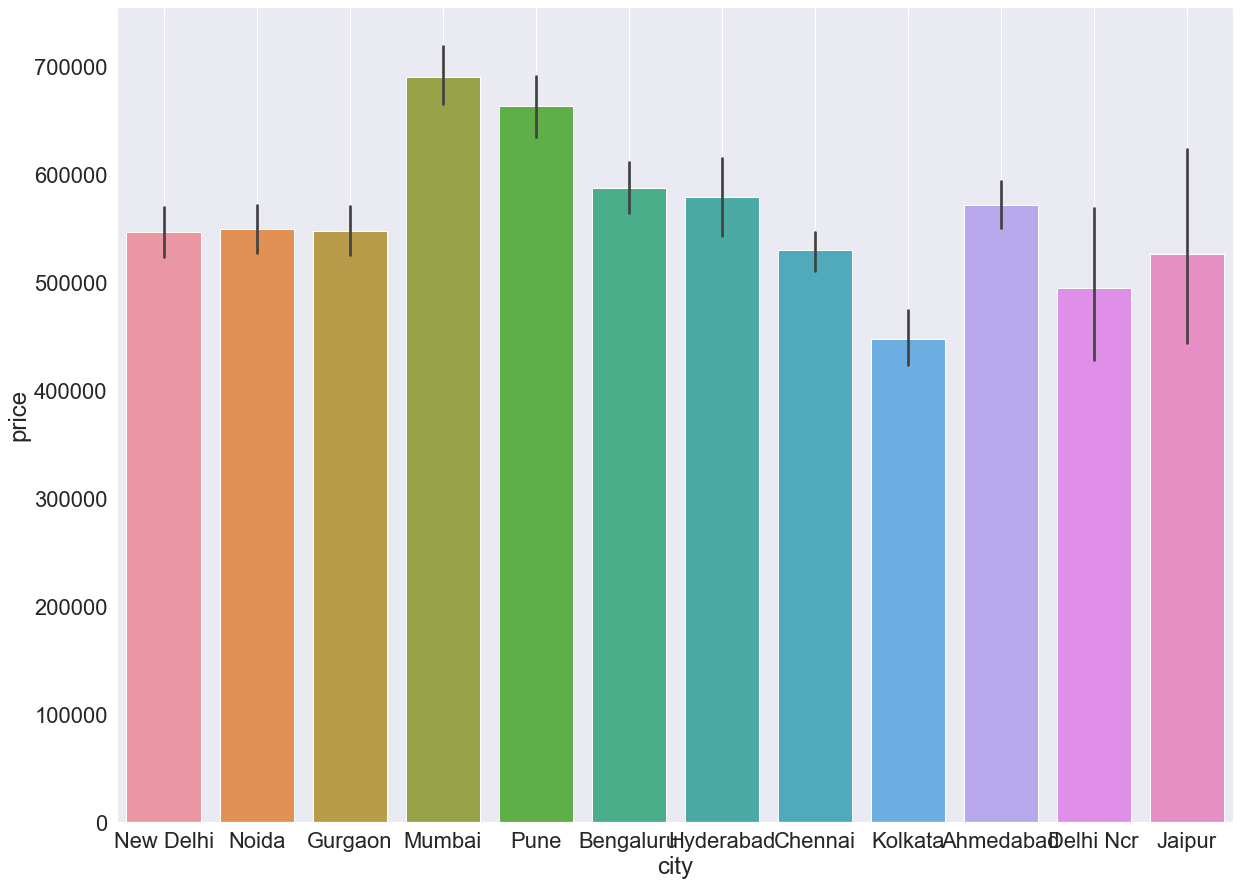

In [80]:
#Price and City
plt.figure(figsize=(20,15))
sn.set(font_scale=2)
sn.barplot(x='city', y='price', data=cars)
plt.grid()

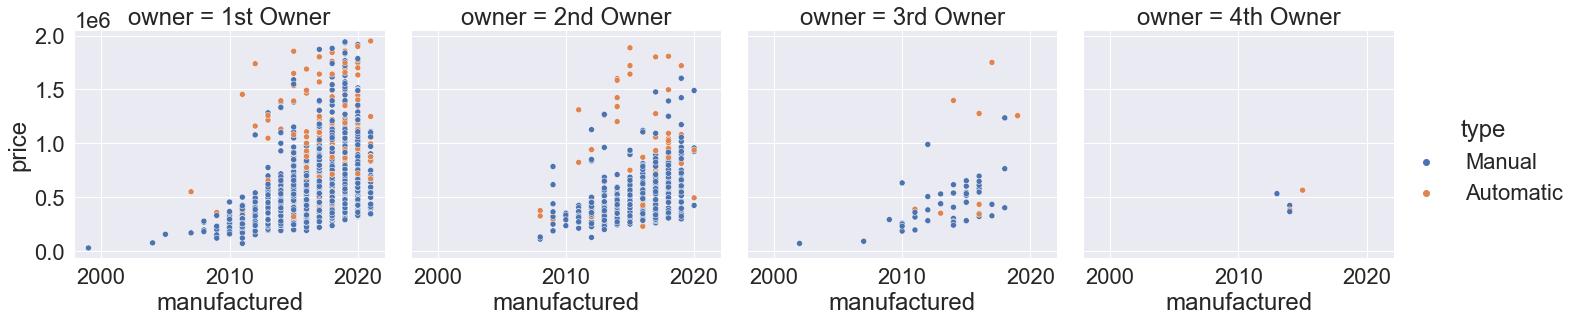

In [81]:
#Owner type
sn.relplot(data=cars, y='price',x='manufactured',col='owner',hue='type',aspect=1,height=5)

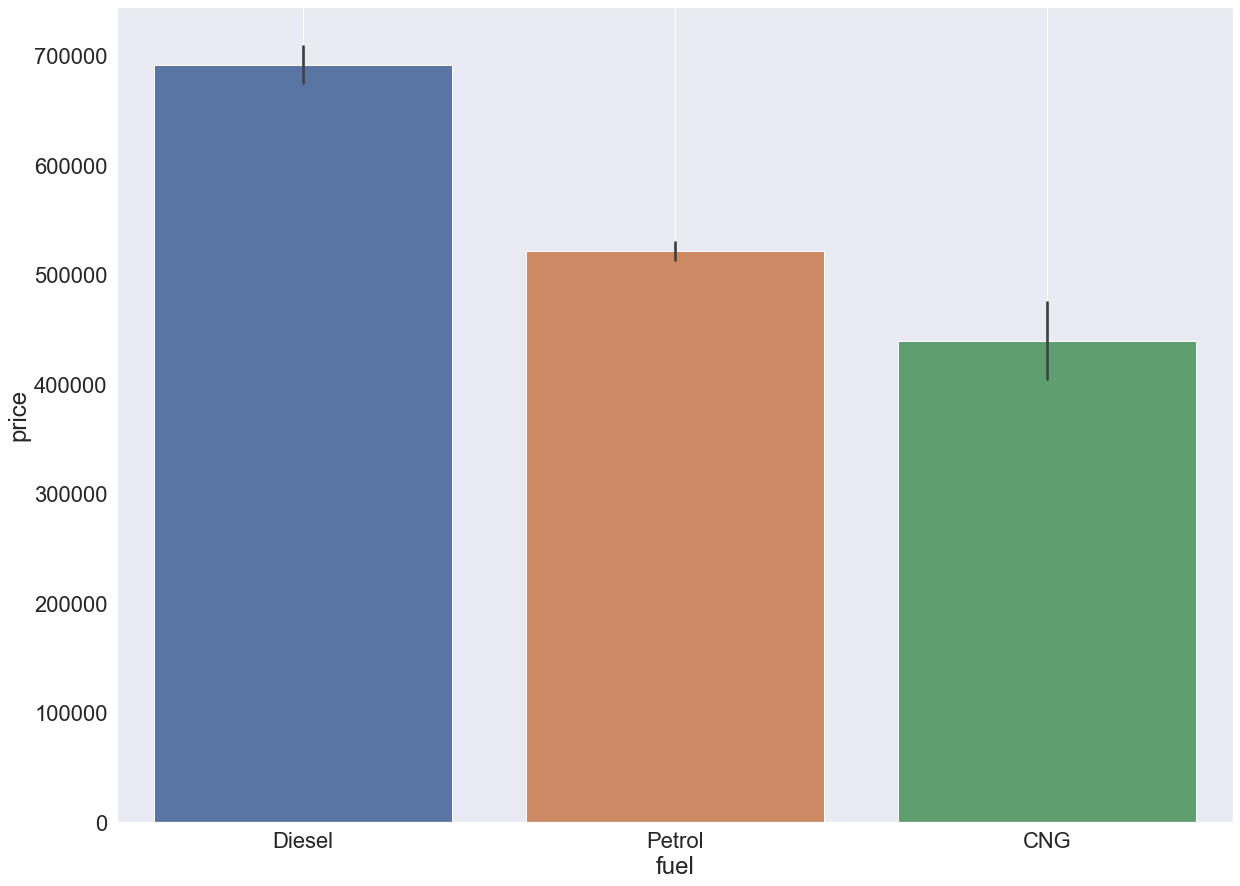

In [82]:
#Fuel Type and Price
plt.figure(figsize=(20,15))
sn.set(font_scale=2)
sn.barplot(x='fuel', y='price', data=cars)
plt.grid()

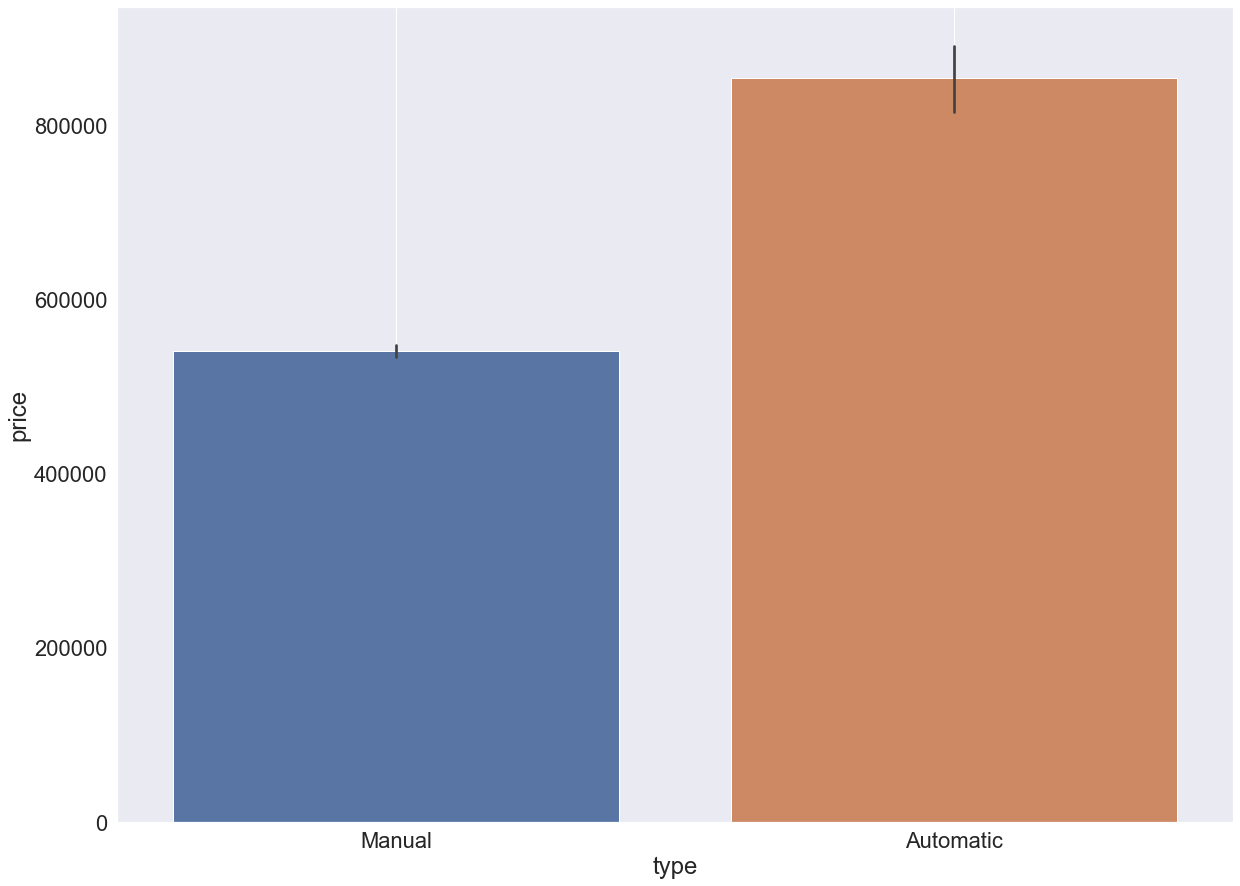

In [83]:
#Transmission Type and Price
plt.figure(figsize=(20,15))
sn.set(font_scale=2)
sn.barplot(x='type', y='price', data=cars)
plt.grid()

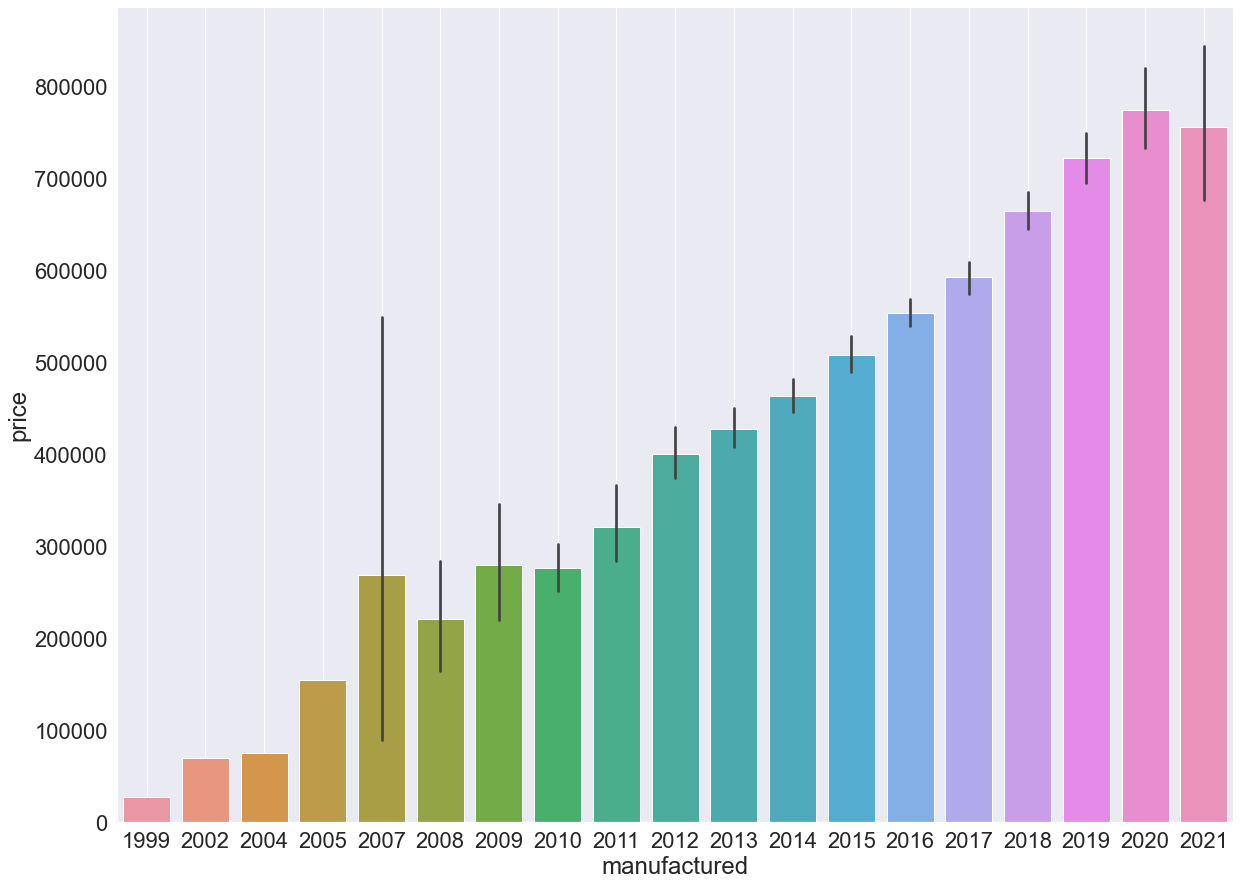

In [84]:
#Manufactured Year and Price
plt.figure(figsize=(20,15))
sn.set(font_scale=2)
sn.barplot(x='manufactured', y='price', data=cars)
plt.grid()

In [85]:
#OBSERVATION

# There are a lot of cars sold on 2017 and 2018 
# The highest selling brand is maruti followed by hyundai
# The Maruti brand have the highest price
# The cars in Mumbai and Pune have the highest price
# The price decreases as number of owner increases.
# The automatic transmission cars have a higher price than manual transmission cars.
# The Deisel Fuel type cars are more expensive compared to other fuel type.
# The older manufactured year are sold cheaper compared to latest manufactured year.

In [86]:
#Checking the datatypes
cars.dtypes

manufactured     int64
brand           object
variant         object
owner           object
fuel            object
type            object
kms              int32
price            int32
city            object
dtype: object

In [87]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4853 entries, 0 to 4852
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   manufactured  4853 non-null   int64 
 1   brand         4853 non-null   object
 2   variant       4853 non-null   object
 3   owner         4853 non-null   object
 4   fuel          4853 non-null   object
 5   type          4853 non-null   object
 6   kms           4853 non-null   int32 
 7   price         4853 non-null   int32 
 8   city          4853 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 303.4+ KB


In [88]:
cars.head()

,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,2012,Maruti,Maruti Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi
1,2013,Maruti,Maruti Swift,1st Owner,Diesel,Manual,114506,341599,New Delhi
2,2014,Maruti,Maruti Ritz,1st Owner,Diesel,Manual,43382,344199,New Delhi
3,2013,Hyundai,Hyundai i20,1st Owner,Diesel,Manual,64361,355799,New Delhi
4,2014,Maruti,Maruti Swift,1st Owner,Petrol,Manual,107206,401599,New Delhi


In [89]:
# Model
x = cars.drop(columns='price')
y = cars['price']

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [92]:
#Encoding the Categorical Data
ohe = OneHotEncoder()
ohe.fit(x[['brand', 'variant', 'owner', 'fuel', 'type', 'city']])

OneHotEncoder()

In [93]:
#Creating a categories
ohe.categories_

[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Ford', 'Honda', 'Hyundai',
        'Jaguar', 'Jeep', 'Kia', 'Landrover', 'MG', 'Mahindra', 'Maruti',
        'Mercedes', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['Audi Q3', 'BMW 3 Series', 'BMW 5 Series', 'BMW X1', 'BMW X3',
        'Chevrolet Beat', 'Chevrolet Cruze', 'Chevrolet Optra',
        'Chevrolet Sail Hatchback', 'Chevrolet Spark', 'Datsun GO',
        'Datsun GO Plus', 'Datsun Redi Go', 'Datsun RediGO',
        'Ford Ecosport', 'Ford Fiesta', 'Ford Figo', 'Ford Figo Aspire',
        'Ford Freestyle', 'Ford New Figo', 'Honda Amaze', 'Honda BR-V',
        'Honda Brio', 'Honda CRV', 'Honda City', 'Honda Civic',
        'Honda Jazz', 'Honda Mobilio', 'Honda WR-V', 'Hyundai Aura',
        'Hyundai Creta', 'Hyundai EON', 'Hyundai Elite i20', 'Hyundai Eon',
        'Hyundai GRAND I10 NIOS', 'Hyundai Grand i10',
        'Hyundai Grand i10 Nios', 'Hyundai New Ela

In [94]:
#Transform the column into OneHotEncoder
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
['brand', 'variant', 'owner', 'fuel', 'type','city']), remainder ='passthrough')

In [95]:
lr=LinearRegression()

In [96]:
#Calls for the column that was being transform and directly using linear regression
pipe=make_pipeline(column_trans,lr)

In [97]:
# Using the pipeline to make the preprocessing easy
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Ford', 'Honda', 'Hyundai',
       'Jaguar', 'Jeep', 'Kia', 'Landrover', 'MG', 'Mahindra', 'Maruti',
       'Mercedes', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],...
                                                                            array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['Ahmedabad', 'Be

In [98]:
# Testing the prediction
y_pred = pipe.predict(x_test)

In [99]:
r2_score(y_test,y_pred)

0.8931184240602186

In [100]:
cars.shape

(4853, 9)

In [101]:
scores=[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [102]:
np.argmax(scores)

2

In [103]:
scores[np.argmax(scores)]

0.921066022669192

In [104]:
# Using the 5000 because its close to our 4883 row
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 23)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.9036833966400908

In [105]:
import pickle

In [106]:
#Saving the model
pickle.dump(pipe,open('LinearRegressionModel.pkl', 'wb'))

In [107]:
#Actual price and Predicted price
cars.tail(1)

,manufactured,brand,variant,owner,fuel,type,kms,price,city
4852,2015,Honda,Honda City,1st Owner,Petrol,Manual,75856,656500,Noida


In [108]:
pipe.predict(pd.DataFrame([[2015, 'Honda', 'Honda City', '1st Owner', 'Petrol', 'Manual', 75856, 'Noida' ]], 
columns=['manufactured', 'brand', 'variant', 'owner', 'fuel', 'type', 'kms', 'city']))

array([659281.19808476])

In [109]:
cars.head(1)

,manufactured,brand,variant,owner,fuel,type,kms,price,city
0,2012,Maruti,Maruti Swift Dzire,1st Owner,Diesel,Manual,118117,316399,New Delhi


In [110]:
pipe.predict(pd.DataFrame([[2012, 'Maruti', 'Maruti Swift Dzire', '1st Owner', 'Diesel', 'Manual', 118117, 'New Delhi' ]], 
columns=['manufactured', 'brand', 'variant', 'owner', 'fuel', 'type', 'kms', 'city']))

array([325014.06519838])

In [111]:
#Batch prediction
test_model = pickle.load(open('LinearRegressionModel.pkl','rb'))

In [114]:
new_xdata=cars.sample(10)
print(new_xdata)

      manufactured    brand             variant      owner    fuel    type  \
2134          2017   Maruti        Maruti Swift  1st Owner  Diesel  Manual   
928           2016   Maruti         Maruti Ciaz  1st Owner  Diesel  Manual   
1565          2018     Ford       Ford Ecosport  1st Owner  Petrol  Manual   
3787          2013   Maruti  Maruti Wagon R 1.0  1st Owner  Petrol  Manual   
1254          2014   Maruti  Maruti Wagon R 1.0  1st Owner  Petrol  Manual   
2039          2016   Maruti       Maruti Baleno  1st Owner  Diesel  Manual   
13            2018   Maruti       Maruti Baleno  1st Owner  Petrol  Manual   
3274          2016   Maruti        Maruti Swift  1st Owner  Petrol  Manual   
2051          2019  Hyundai       Hyundai Venue  1st Owner  Petrol  Manual   
3849          2017  Hyundai         Hyundai Eon  2nd Owner  Petrol  Manual   

         kms    price       city  
2134   23547   612099       Pune  
928   168380   559299      Noida  
1565   44329   821999     Mumbai  
3

In [115]:
pred=test_model.predict(new_xdata)
x = np.array(list(map(np.int_, pred)))
print(x)

[617422 547051 811222 244500 313699 565421 625576 563824 935112 336979]
